In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../datasets/Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.drop(['Serial No.'], axis=1, inplace=True)

In [4]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
df.rename(columns={'Chance of Admit ':'Chance of Admit', 'LOR ': 'LOR'}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Exploratory Data Analysis
---

### Checking null values

<AxesSubplot:>

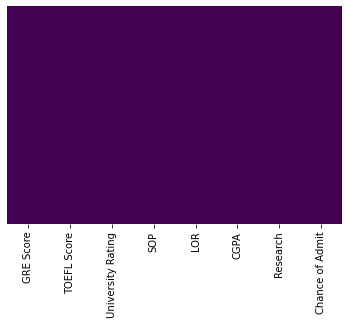

In [8]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")

In [9]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Checking correlation

<AxesSubplot:>

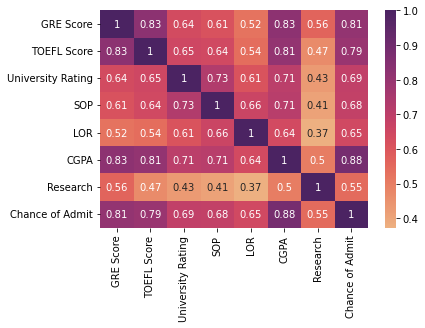

In [10]:
sns.heatmap(df.corr(), cmap="flare", annot=True)

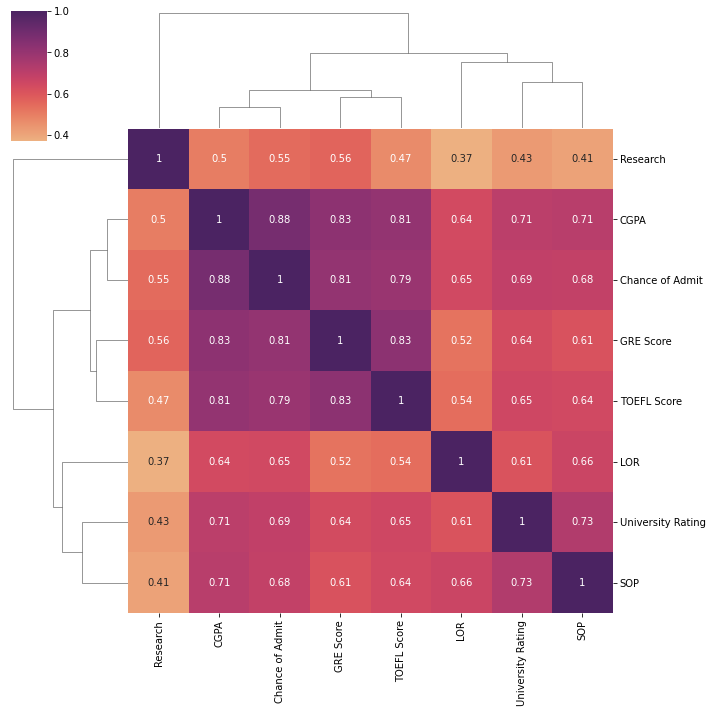

In [11]:
sns.clustermap(df.corr(), cmap="flare", annot=True)

#### CGPA, GRE, TOEFL scores are most correlated with Chance of Admit 

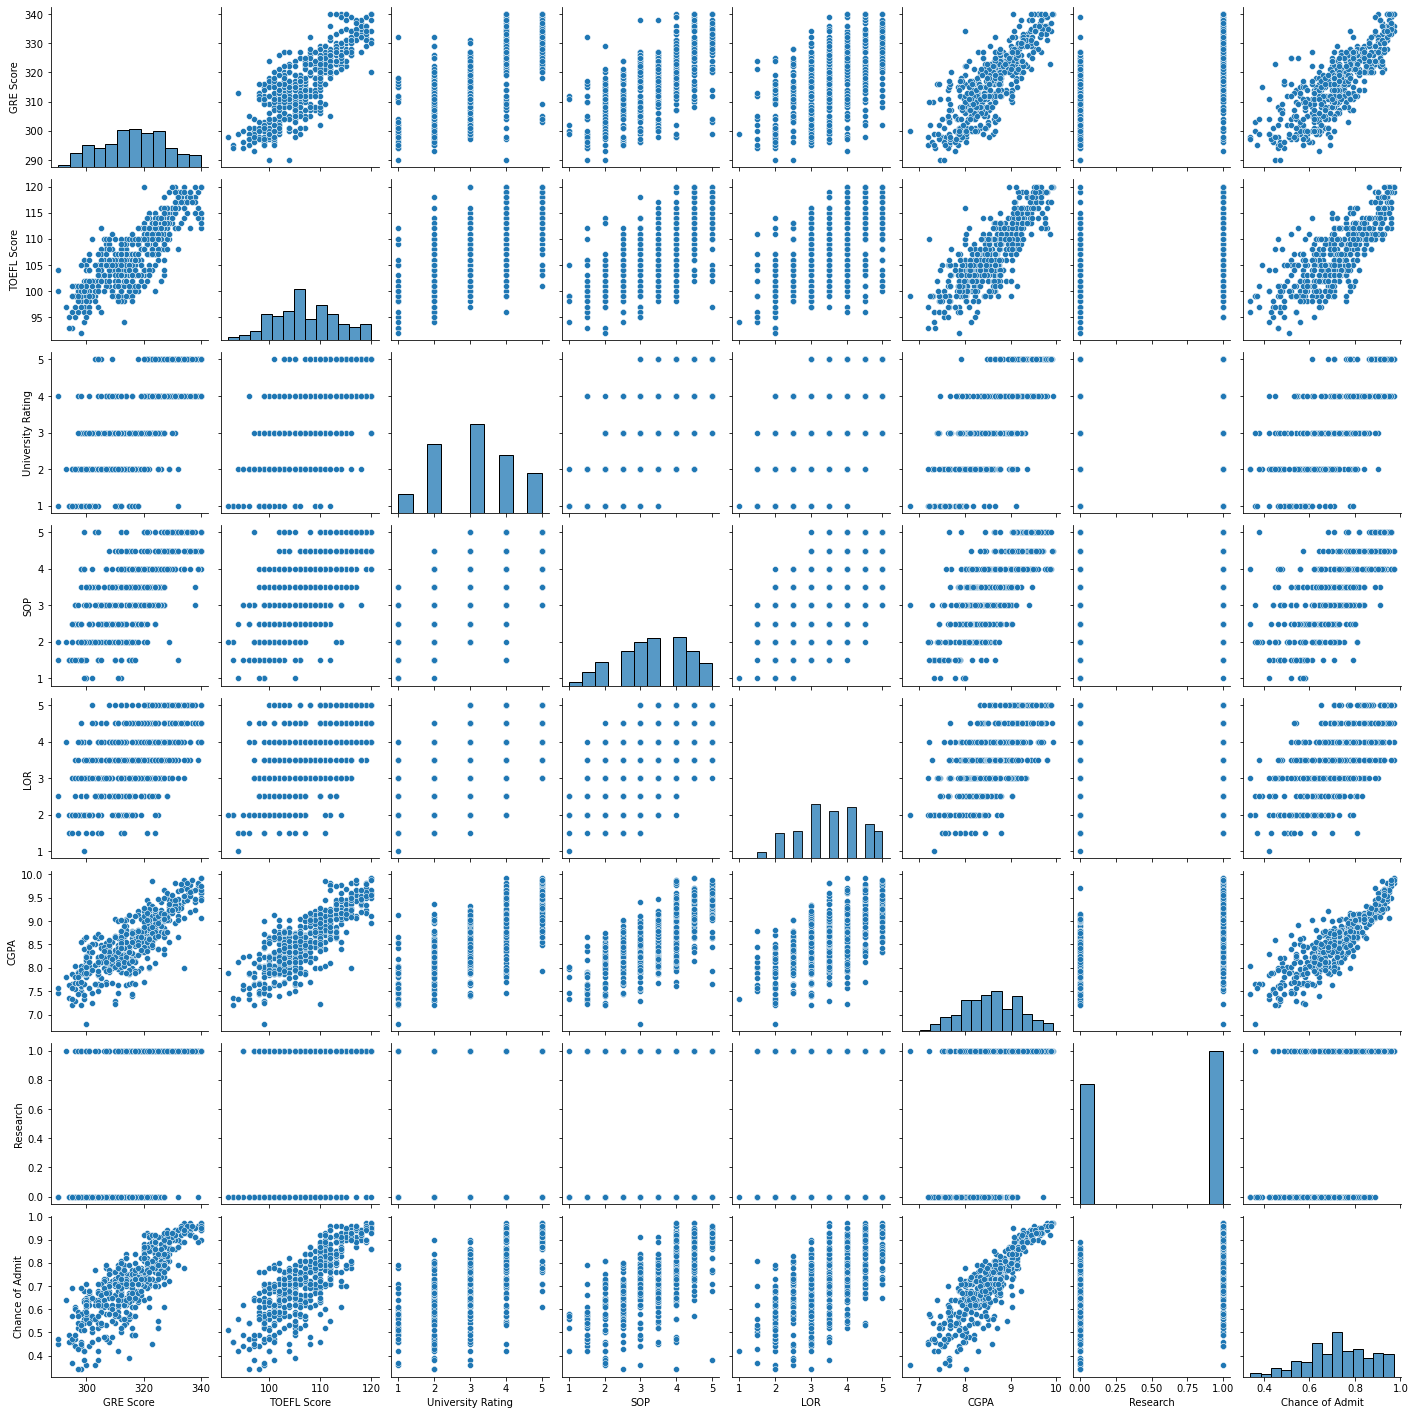

In [12]:
sns.pairplot(df)

### Distributions of CGPA, GRE, TOEFL scores

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

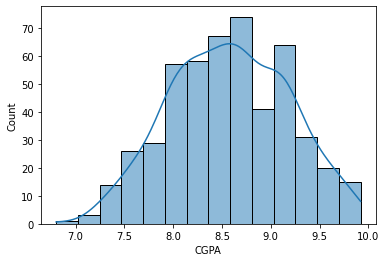

In [13]:
sns.histplot(x = df['CGPA'], kde=True)

<AxesSubplot:xlabel='GRE Score', ylabel='Count'>

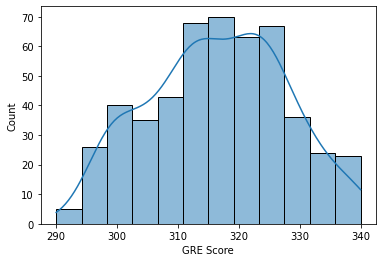

In [14]:
sns.histplot(x = df['GRE Score'], kde=True)

<AxesSubplot:xlabel='TOEFL Score', ylabel='Count'>

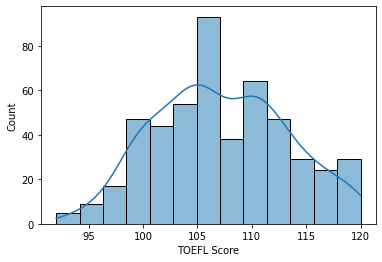

In [15]:
sns.histplot(x = df['TOEFL Score'], kde=True)

### Relation between Scores

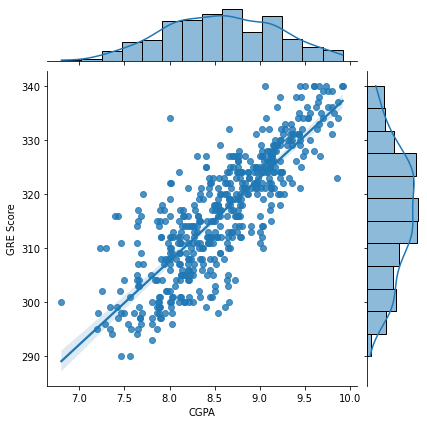

In [16]:
sns.jointplot(x='CGPA', y='GRE Score', data=df, kind="reg")

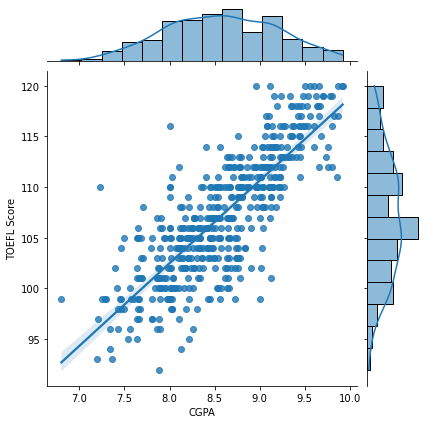

In [17]:
sns.jointplot(x='CGPA', y='TOEFL Score', data=df, kind="reg")

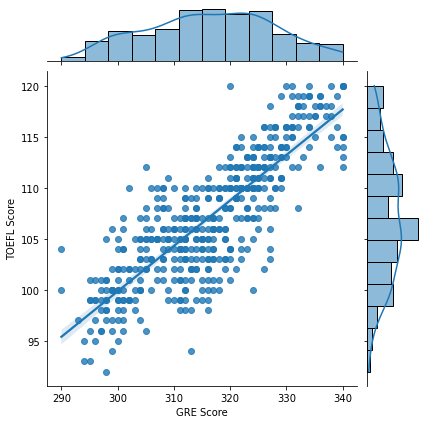

In [18]:
sns.jointplot(x='GRE Score', y='TOEFL Score', data=df, kind="reg")

#### Students who do well in one test tend to do well in other tests too

### Number of Universities of each rating

<AxesSubplot:xlabel='University Rating', ylabel='count'>

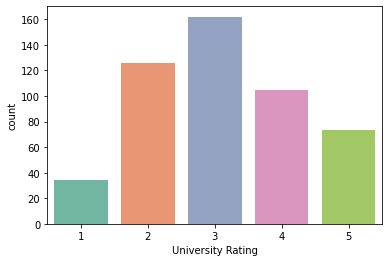

In [19]:
sns.countplot(x='University Rating', data=df, palette='Set2')

### Effect of Research on Chance of Admit

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit'>

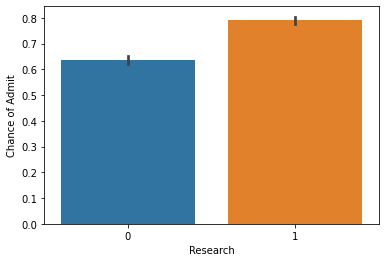

In [20]:
sns.barplot(x='Research', y='Chance of Admit', data=df)

In [21]:
df[df['Research']==0]['Chance of Admit'].mean()

0.6349090909090905

In [22]:
df[df['Research']==1]['Chance of Admit'].mean()

0.7899642857142857

#### Students with Research background have slightly higher Chance of Admit

### Effect of LORs and SOPs on Chance of Admit

<AxesSubplot:xlabel='LOR', ylabel='Chance of Admit'>

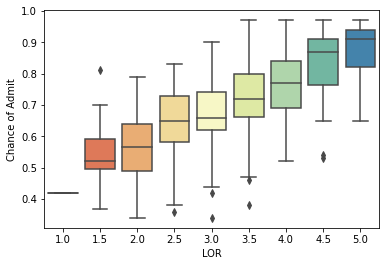

In [23]:
sns.boxplot(x='LOR', y='Chance of Admit', data=df, palette='Spectral')

<AxesSubplot:xlabel='SOP', ylabel='Chance of Admit'>

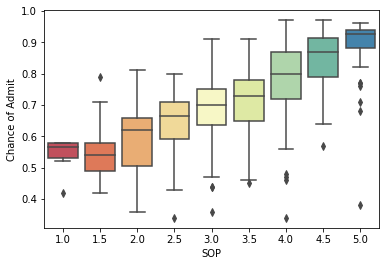

In [24]:
sns.boxplot(x='SOP', y='Chance of Admit', data=df, palette='Spectral')

#### Students with better LORs and SOPs have better Chance of Admit

# Regression Model
---

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop(['Chance of Admit'], axis=1)
y = df['Chance of Admit']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [29]:
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
lr.score(X_test, y_test)

0.8188432567829629

In [31]:
predictions = lr.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Square Error:", rmse)

Root Mean Square Error: 0.06086588041578311


### Finding best Regression Model

In [33]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [34]:
def best_regression_model(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 0.5, 1.0, 10.0]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [150, 100, 50]
            }
        },
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=4)
    for name, algo in algos.items():
        gs = GridSearchCV(algo['model'], algo['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [35]:
best_regression_model(X, y)

,model,best_score,best_params
0,linear_regression,0.793941,{'normalize': True}
1,ridge,0.793912,{'alpha': 0.1}
2,random_forest,0.776132,{'n_estimators': 50}


#### Linear Regression still performs the best

### Testing few predictions

In [36]:
lr.predict([[300, 100, 5, 4, 4, 7, 0]])[0]

0.48521205820001345

In [37]:
lr.predict([[310, 120, 4, 2, 2, 8, 0]])[0]

0.641328848927349

In [38]:
lr.predict([[330, 110, 2, 5, 5, 9.5, 1]])[0]

0.9048937229516634

### Exporting the Regression Model

In [39]:
import pickle
pickle.dump(lr, open('graduate_admissions_regressor.pickle', 'wb'))

# Classification Model
---

#### 1 -> Low chance  <br/> 2 -> Moderate chance <br/> 3 -> Good chance

In [40]:
def calc_chance(val):
    if val > 0.75:
        return 3
    elif val > 0.5:
        return 2
    else:
        return 1

In [41]:
df1 = df.copy()
df1['Chance'] = df1['Chance of Admit'].apply(calc_chance)

In [42]:
df1.drop(['Chance of Admit'], axis=1, inplace=True)

In [43]:
df1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,3
1,324,107,4,4.0,4.5,8.87,1,3
2,316,104,3,3.0,3.5,8.00,1,2
3,322,110,3,3.5,2.5,8.67,1,3
4,314,103,2,2.0,3.0,8.21,0,2


In [44]:
df1['Chance'].value_counts()

2    251
3    210
1     39
Name: Chance, dtype: int64

In [45]:
X1 = df1.drop(['Chance'], axis=1)
y1 = df1['Chance'] 

### Scaling the features

In [46]:
from sklearn.preprocessing import StandardScaler
X1_scaled = StandardScaler().fit_transform(X1)
pd.DataFrame(X1_scaled).head()

,0,1,2,3,4,5,6
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152


### Finding best Classification Model

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [48]:
def best_classification_model(X, y):
    algos = {
        'knn': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [*range(1,30)]
            }
        },
        'svc': {
            'model': SVC(),
            'params': {
                'C': [10.0, 15.0, 20.0, 25.0, 30.0],
                'kernel': ['linear', 'poly', 'rbf']
            }
        },
        'random_forest': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [100, 150, 200],
                'criterion': ['gini', 'entropy']
            }
        },
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    for name, algo in algos.items():
        gs = GridSearchCV(algo['model'], algo['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [49]:
best_classification_model(X1_scaled, y1)

,model,best_score,best_params
0,knn,0.832,{'n_neighbors': 6}
1,svc,0.850,"{'C': 10.0, 'kernel': 'linear'}"
2,random_forest,0.830,"{'criterion': 'gini', 'n_estimators': 100}"


#### SVC performs the best

### Making a Pipeline 

In [50]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [51]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('svc', SVC(C=10.0, kernel='linear'))
])

pipe.fit(X1_train, y1_train)
pipe.score(X1_test, y1_test)

0.85

In [52]:
predictions = pipe.predict(X1_test)

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [54]:
print("Accuracy:", accuracy_score(y1_test, predictions))

Accuracy: 0.85


In [55]:
print(confusion_matrix(y1_test, predictions))

[[ 4  5  0]
 [ 1 48  6]
 [ 0  3 33]]


### Testing few predictions

In [56]:
pipe.predict([[300, 100, 5, 4, 4, 7, 0]])[0]

1

In [57]:
pipe.predict([[310, 120, 4, 2, 2, 8, 0]])[0]

2

In [58]:
pipe.predict([[330, 110, 2, 5, 5, 9.5, 1]])[0]

3

### Exporting the Classification Model

In [59]:
import pickle
pickle.dump(pipe, open('graduate_admissions_classifier.pickle', 'wb'))

---